ЗАГРУЗКА И ПРОСМОТР ДАННЫХ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("real_estate_data.csv",sep="\t")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


ГИСТОГРАММА

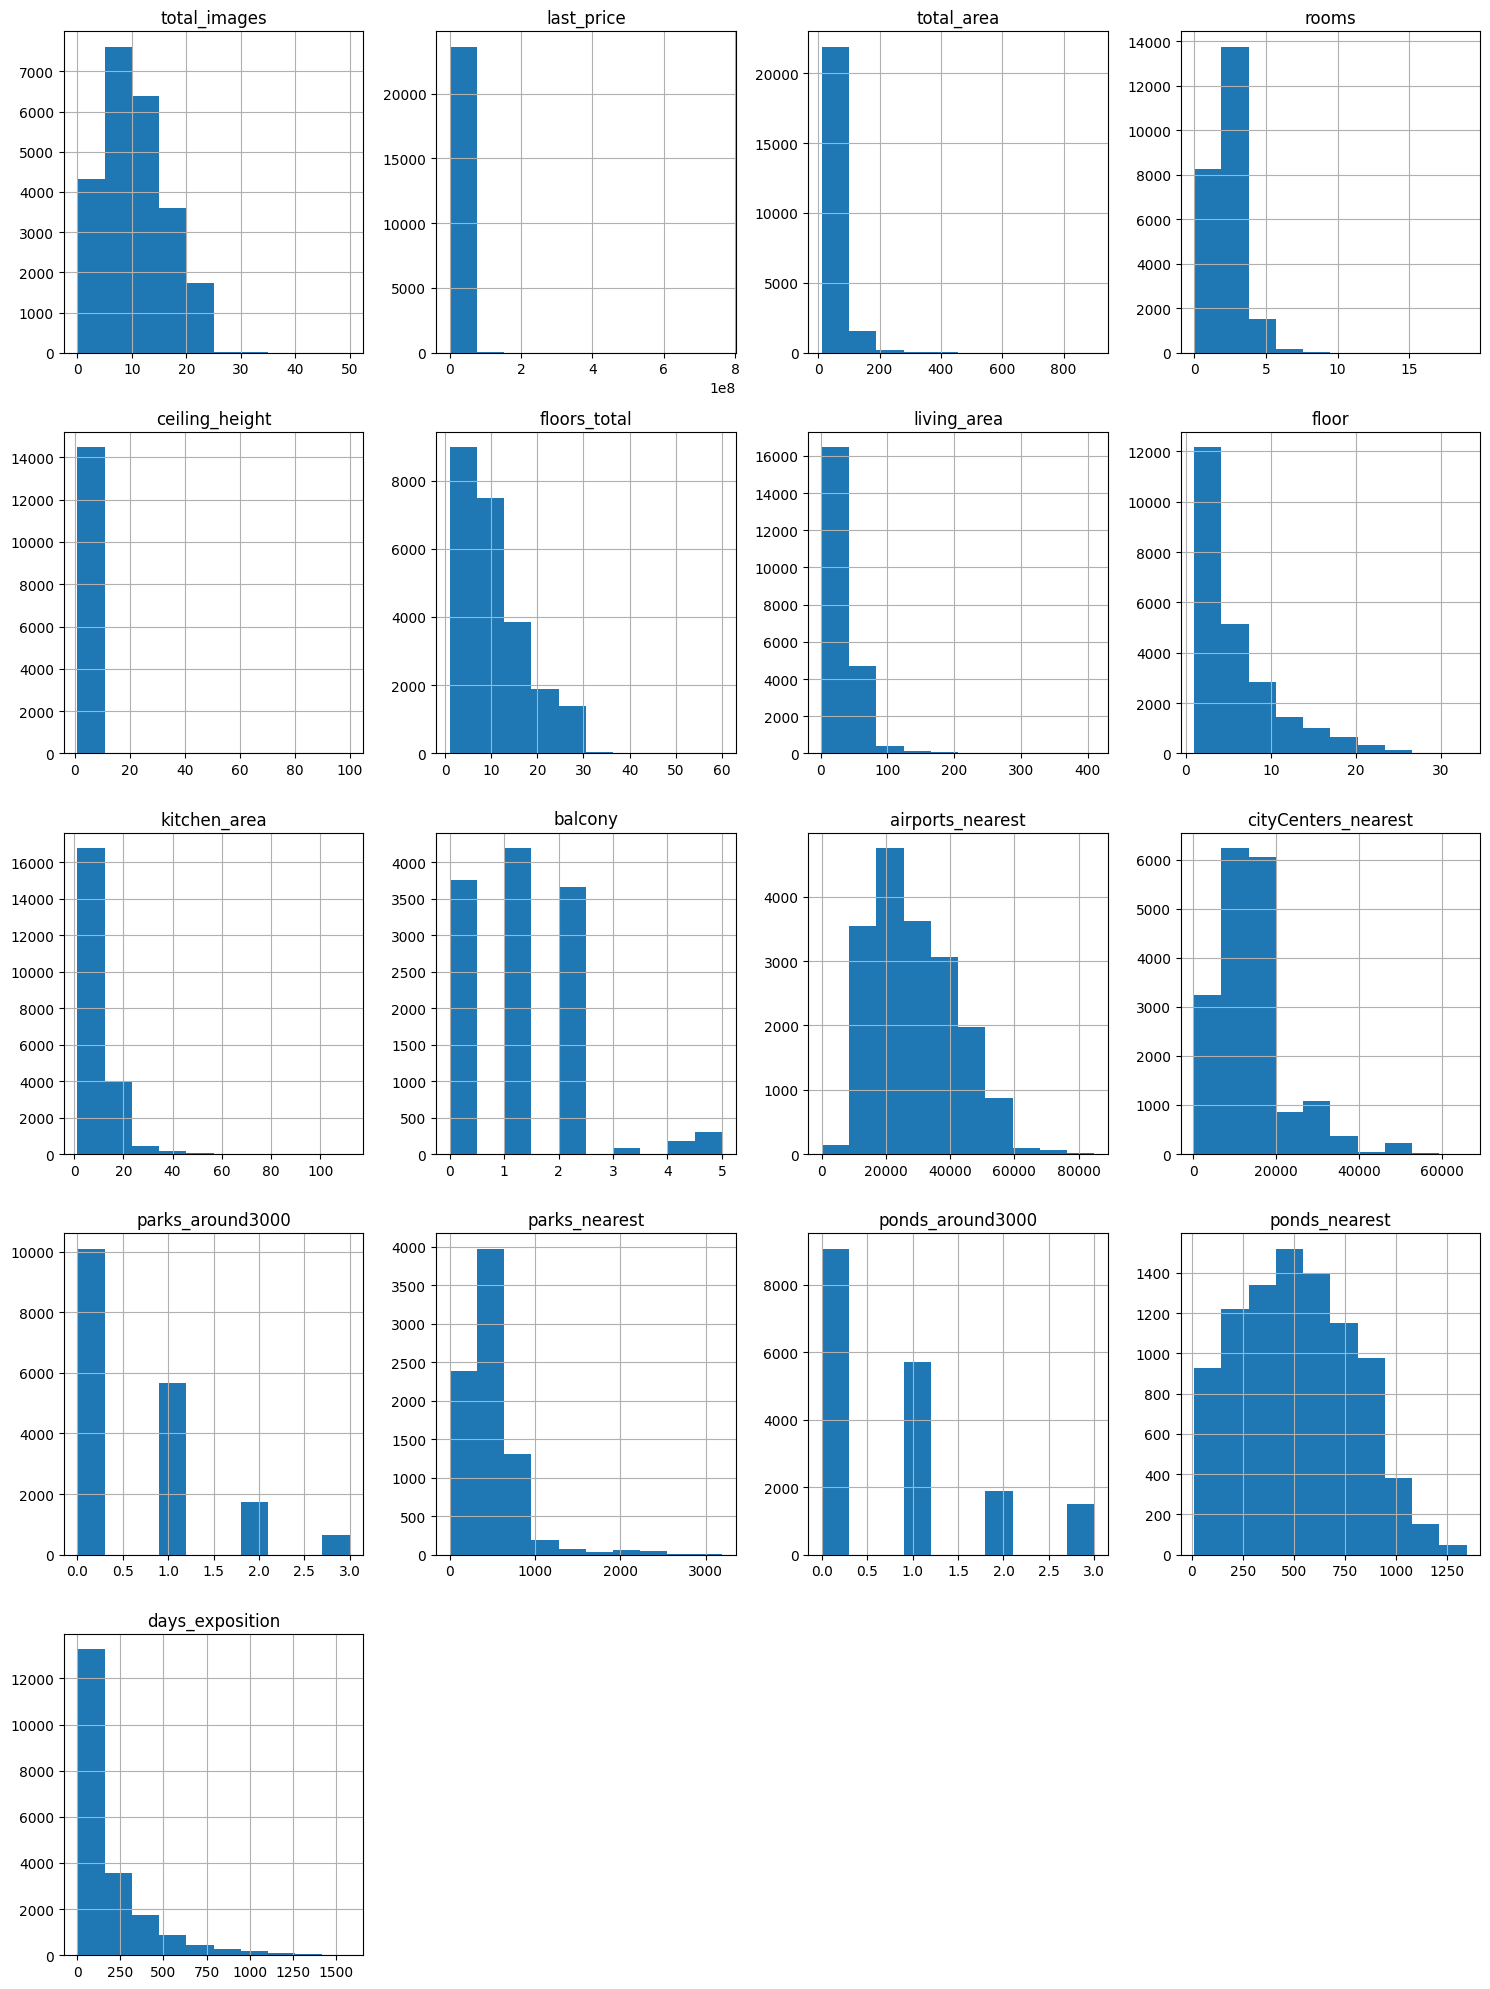

In [ ]:
df.hist(figsize=(15, 20))
plt.tight_layout()
plt.show()

ПРЕДОБРАБОТКА ДАННЫХ

ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ

In [ ]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


ЗАПОЛНЕНИЕ ПРОПУСКОВ

In [ ]:
df['balcony'] = df['balcony'].fillna(0)
df['is_apartment'] = df['is_apartment'].fillna(False)
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['living_area'] = df['living_area'].fillna(df['total_area'] * 0.7)
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * 0.15)
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].mode()[0])
df['parks_nearest'] = df['parks_nearest'].fillna(0)
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)
df['days_exposition'] = df['days_exposition'].fillna(0)

<ipython-input-4-ee8a111e669e>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_apartment'] = df['is_apartment'].fillna(False)


ПОЯСНЕНИЕ:
1. Если балконы не указаны, скорее всего, их нет
2. Если не указано, то вероятно, не апартаменты
3. Медиана для высоты потолка
4. Доля общей площади
5. Доля общей площади
6. Выбор самого частого значения
7. Пропуск = отсутствие
8. Пропуск = отсутствие
9. Медиана

In [ ]:
print(df.dtypes)

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object


In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], errors='coerce')
df['floors_total'] = df['floors_total'].astype('Int64')
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('Int64')
df['ponds_around3000'] = df['ponds_around3000'].astype('Int64')

ПОЯСНЕНИЕ:
1. Преобразование в дату
2. Целое число, может содержать nan
3. Количество балконов не может быть дробным
4. Количестов парков не может быть дробным
5. Количество водоёмов не может быть дробным

In [ ]:
print(df['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [ ]:
df['locality_name'] = (df['locality_name']
    .str.replace('посёлок', 'поселок') # Заменяет "ё" на "е".
    .str.replace('городской посёлок', 'городской поселок')
    .str.replace('посёлок городского типа', 'поселок городского типа')
    .str.replace('посёлок при железнодорожной станции','поселок при станции')
    .str.replace('Кудрово','деревня Кудрово')
    .str.strip() # Убираем пробелы перед текстом.
)
print(df['locality_name'].unique())

['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'деревня Фёдоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино'
 'поселок Металлострой' 'поселок городского типа Лебяжье'
 'поселок городского типа Сиверский' 'поселок Молодцово'
 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок городского типа Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня К

ДОБАВЛЕНИЕ СТОЛБЦОВ

In [ ]:
df["price_per_sqm"] = (df["last_price"] / df["total_area"]).round(2)
df["first_day_exposition"] = pd.to_datetime(df["first_day_exposition"], errors="coerce")
df["weekday_exposition"] = df["first_day_exposition"].dt.weekday
df["month_exposition"] = df["first_day_exposition"].dt.month
df["year_exposition"] = df["first_day_exposition"].dt.year
df['floor_type'] = np.where(
    df['floor'] == 1,
    'первый',
    np.where(
        df['floor'] == df['floors_total'],
        'последний',
        'другой'
    )
).astype("str")
df["city_center_distance_km"] = (df["cityCenters_nearest"] / 1000).round().astype("Int64")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23699 non-null  int64         
 1   last_price               23699 non-null  float64       
 2   total_area               23699 non-null  float64       
 3   first_day_exposition     23699 non-null  datetime64[ns]
 4   rooms                    23699 non-null  int64         
 5   ceiling_height           23699 non-null  float64       
 6   floors_total             23699 non-null  Int64         
 7   living_area              23699 non-null  float64       
 8   floor                    23699 non-null  int64         
 9   is_apartment             23699 non-null  bool          
 10  studio                   23699 non-null  bool          
 11  open_plan                23699 non-null  bool          
 12  kitchen_area             23699 n

ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ

In [ ]:
def remove_outliers(data, column,low,high):
    if data[column].dtype=='object':
        return data
    q_low = data[column].quantile(low)
    q_high = data[column].quantile(high)
    return data[(data[column] < q_high) & (data[column] > q_low)]

columns_to_analyze = [
    'total_area', 'living_area', 'kitchen_area', 'rooms',
    'ceiling_height', 'floors_total','last_price', 'city_center_distance_km',
    'parks_nearest', 'floor_type'
]
df['ceiling_height'] = df['ceiling_height'].apply(lambda x: x / 10 if x > 10 else x)
df.loc[df['rooms'] == 0, 'rooms'] = 1

ПОСТРОЕНИЕ ГИСТОГРАММ

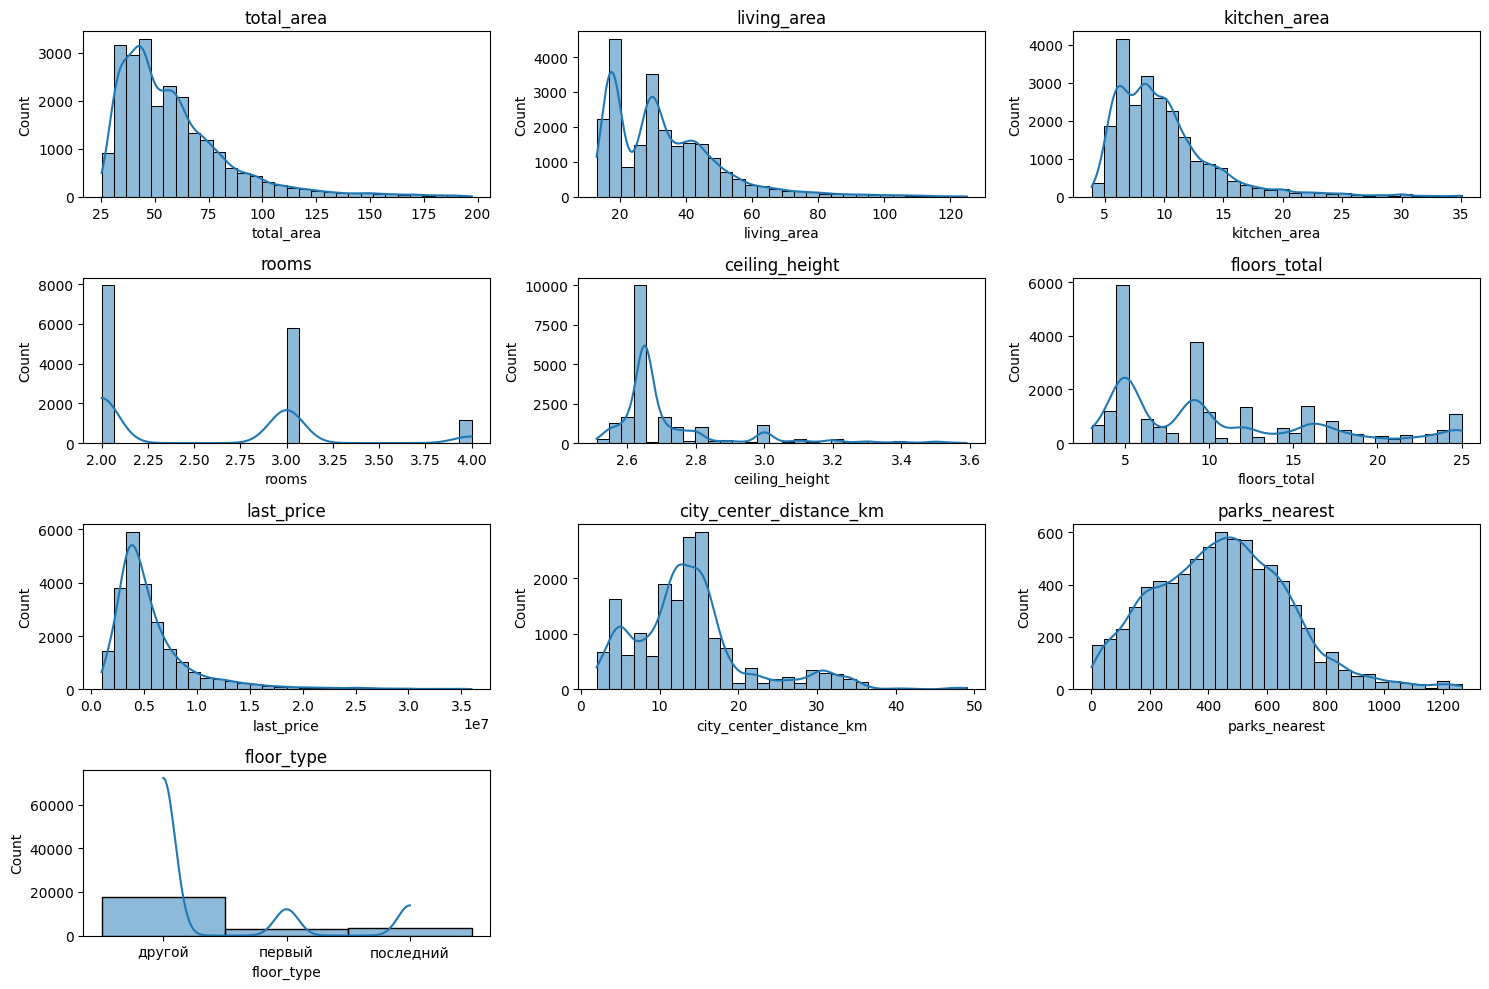

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(4, 3, i)
    filtered_df = remove_outliers(df,column,0.01,0.99)
    sns.histplot(filtered_df[column].dropna(), bins=30, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
mean_days = filtered_df['days_exposition'].mean()
median_days = filtered_df['days_exposition'].median()
print("Среднее количество дней:", mean_days)
print("Медианное количество дней:", median_days)

Среднее количество дней: 156.60884425503187
Медианное количество дней: 74.0


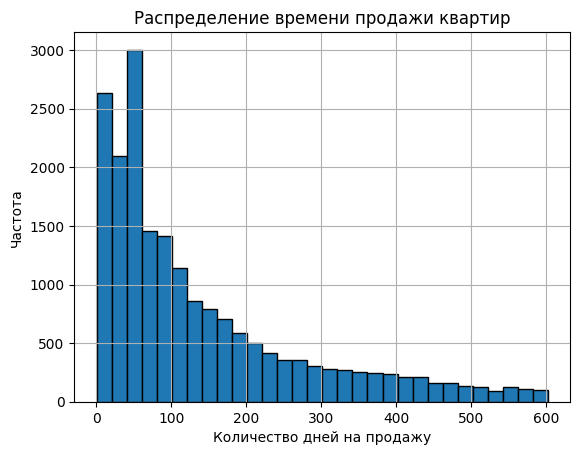

In [ ]:
filtered_df=remove_outliers(df, 'days_exposition', 0, 0.95)
filtered_df['days_exposition'].dropna().hist(bins=30, edgecolor='black')
plt.xlabel('Количество дней на продажу')
plt.ylabel('Частота')
plt.title('Распределение времени продажи квартир')
plt.grid(True)
plt.show()

АНАЛИЗ ВРЕМЕНИ ПРОДАЖИ:
Быстрой продажей можно считать сделки, которые закрылись в пределах первых 1–60 дней, так как на гистограмме заметен пик в этом диапазоне.
Необычно долгие продажи — более 200 дней.

АНАЛИЗ ВЛИЯНИЯ ФАКТОРОВ

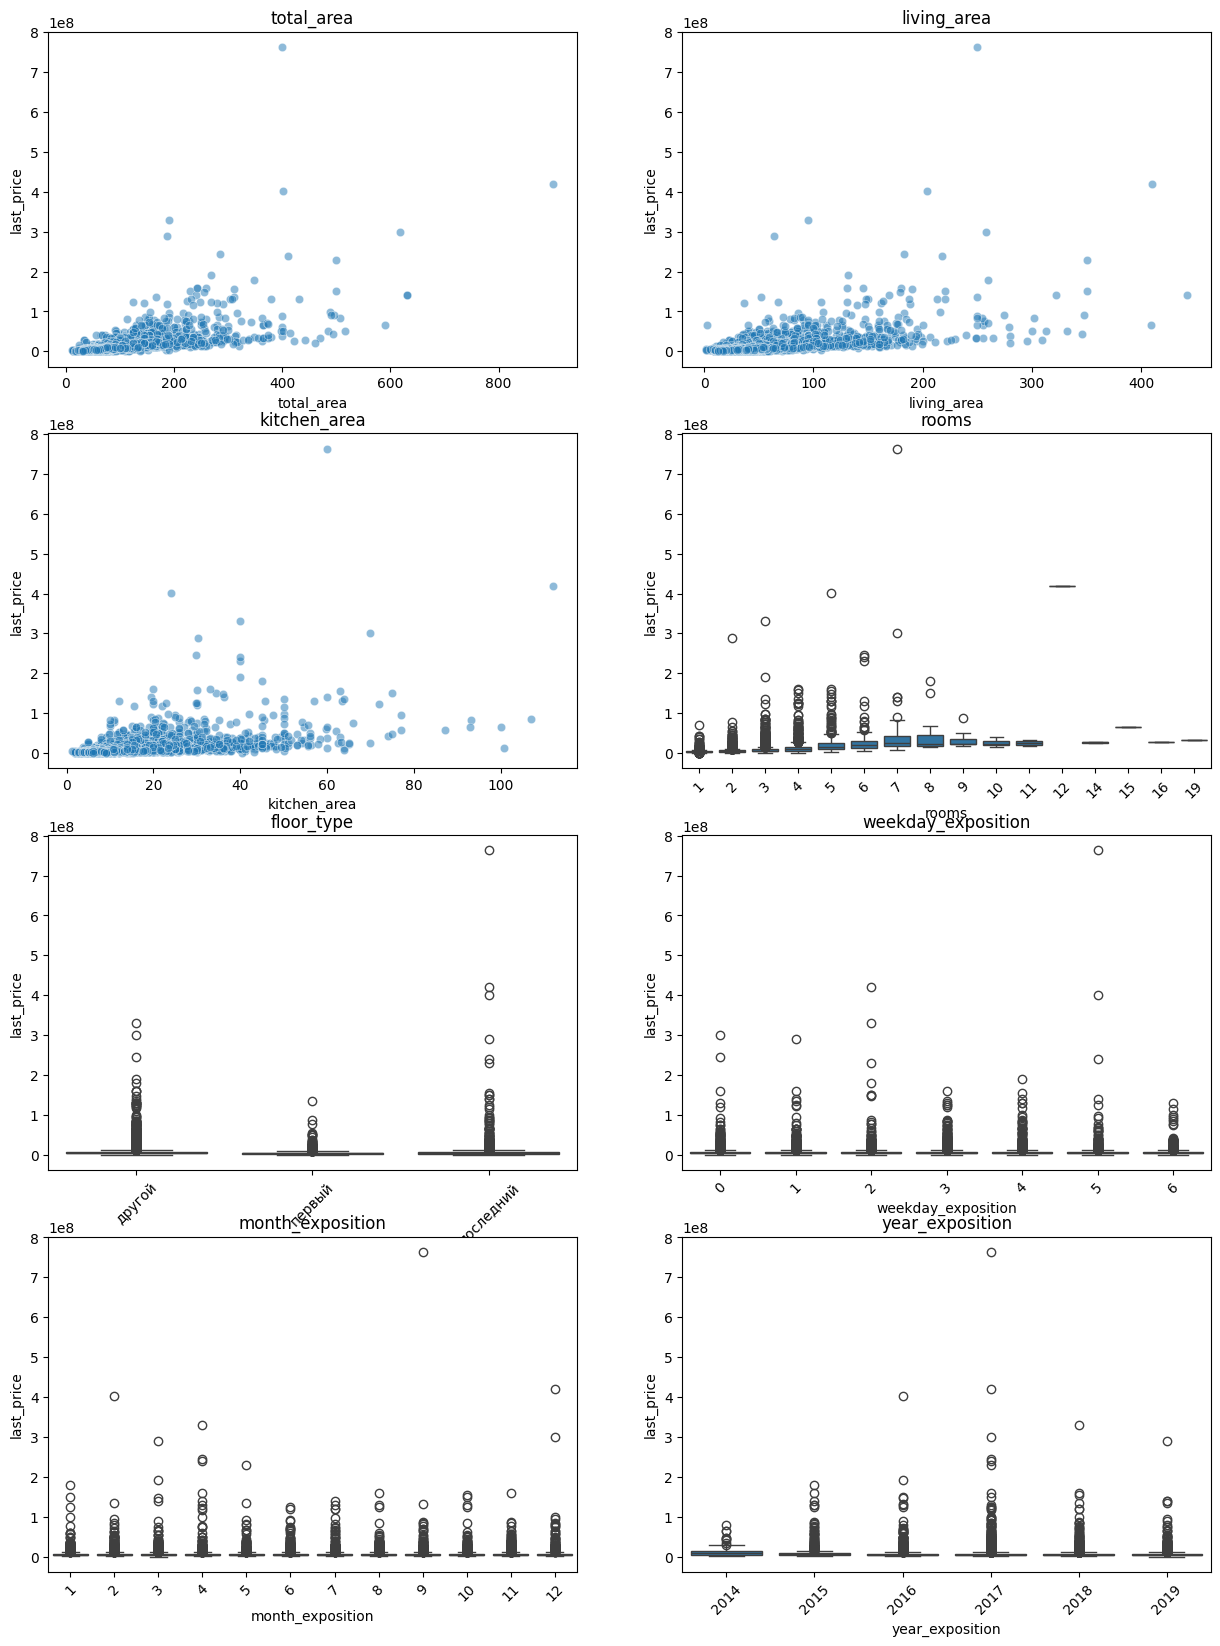

In [ ]:
factors = ['total_area', 'living_area', 'kitchen_area', 'rooms',
        'floor_type', 'weekday_exposition', 'month_exposition', 'year_exposition']
plt.figure(figsize=(15, 20))
for i, factor in enumerate(factors, 1):
    plt.subplot(4, 2, i)
    if factor == 'total_area' or factor == 'living_area' or factor == 'kitchen_area':
        sns.scatterplot(x=df[factor], y=df['last_price'], alpha=0.5)
    else:
        sns.boxplot(x=df[factor], y=df['last_price'])
        plt.xticks(rotation=45)
    plt.title(factor)
    plt.xlabel(factor)
    plt.ylabel('last_price')
plt.show()

РАСЧЁТ ЦЕНЫ ЗА КВ.МЕТР В 10 НАСЕЛЁННЫХ ПУНКТАХ

In [ ]:
locality_stats = (df.groupby('locality_name')
                  .agg({'price_per_sqm': 'mean', 'last_price': 'count'})
                  .rename(columns={'last_price': 'ads_count'})
                  .sort_values(by='ads_count', ascending=False))
top_localities = locality_stats.head(10)
print(top_localities)
highest_price_locality = top_localities['price_per_sqm'].idxmax()
lowest_price_locality = top_localities['price_per_sqm'].idxmin()
print('Населенный пункт с самой высокой ценой за кв.метр',highest_price_locality)
print('Населенный пункт с самой низкой ценой за кв.метр:',lowest_price_locality)

                         price_per_sqm  ads_count
locality_name                                    
Санкт-Петербург          114849.008793      15721
поселок Мурино            85681.762572        556
поселок Шушары            78677.364318        440
Всеволожск                68654.473970        398
Пушкин                   103125.819377        369
Колпино                   75424.579112        338
поселок Парголово         90175.913089        327
Гатчина                   68746.146515        307
деревня деревня Кудрово   92473.547559        299
Выборг                    58141.909325        237
Населенный пункт с самой высокой ценой за кв.метр Санкт-Петербург
Населенный пункт с самой низкой ценой за кв.метр: Выборг


РАСЧЁТ СРЕДНЕЙ СТОИМОСТИ КВАРТИР В САНКТ-ПЕТЕРБУРГЕ

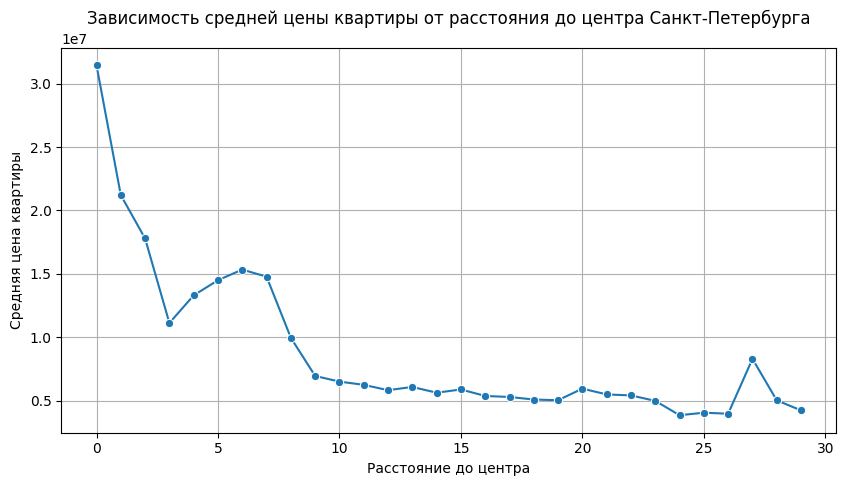

 city_center_distance_km    avg_price
                       0 3.144912e+07
                       1 2.120672e+07
                       2 1.778832e+07
                       3 1.112658e+07
                       4 1.330428e+07
                       5 1.449912e+07
                       6 1.533842e+07
                       7 1.477515e+07
                       8 9.957717e+06
                       9 6.950659e+06
                      10 6.504119e+06
                      11 6.250815e+06
                      12 5.828545e+06
                      13 6.083141e+06
                      14 5.629101e+06
                      15 5.884751e+06
                      16 5.373131e+06
                      17 5.292395e+06
                      18 5.091331e+06
                      19 5.037675e+06
                      20 5.951465e+06
                      21 5.493469e+06
                      22 5.415524e+06
                      23 4.985376e+06
                      24 3.854430e+06
            

In [ ]:
flats = df[df['locality_name'] == 'Санкт-Петербург']
price_by_distance = (flats.groupby('city_center_distance_km')
                         .agg({'last_price': 'mean'})
                         .rename(columns={'last_price': 'avg_price'})
                         .reset_index())
plt.figure(figsize=(10, 5))
sns.lineplot(data=price_by_distance, x='city_center_distance_km', y='avg_price', marker='o')
plt.xlabel('Расстояние до центра')
plt.ylabel('Средняя цена квартиры')
plt.title('Зависимость средней цены квартиры от расстояния до центра Санкт-Петербурга')
plt.grid(True)
plt.show()
print(price_by_distance.to_string(index=False))

Пик цены приходится на центр города и цены уменьшаются по мере удаления от центра

ПОСТРОЕНИЕ МОДЕЛЕЙ

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

features = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type',
            'city_center_distance_km']
target = 'last_price'
features = df[features].copy()
features = pd.get_dummies(features, columns=['floor_type'])
target = df.loc[features.dropna().index, 'last_price'].dropna()
features = features.loc[target.index]
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mae = round(mean_absolute_error(y_test, lr_pred), 2)
randforest = RandomForestRegressor(n_estimators=100, random_state=42)
randforest.fit(X_train, y_train)
randforest_pred = randforest.predict(X_test)
randforest_mae = round(mean_absolute_error(y_test, randforest_pred), 2)
knn_model = KNeighborsRegressor(n_neighbors=6)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_model_mae = round(mean_absolute_error(y_test, knn_predictions), 2)
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)
dummy_mae = mean_absolute_error(y_test, dummy_pred)
print("mae lr:", lr_mae)
print("mae randforest:", randforest_mae)
print("mae knn:", knn_model_mae)
print("mae dummy:", dummy_mae)

mae lr: 2504876.89
mae randforest: 1880106.91
mae knn: 2129323.76
mae dummy: 4395111.8260191595


Лучшей моделью оказалась random forest